# Machine Learning - 101

# Regression - Linear and Logistic

#### Regression = Understanding the relation between different properties of data.

## Why Regression?
Regression is among the most useful machine learning models, and is the easiest to learn.
We use regression everyday in our lives, from temperature prediction to deciding the quantity of vegetables in dinner. It can be understood as very fancy name for inter-polation, i.e., to fill a gap using information around that gap. 
## Why use computers for something I can do myself?
Because you may predict the weather (1 point of information), but you cannot predict the housing prices **accurately enough** (20 features).

In [4]:
from fastai.basics import *
n=100
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
a = tensor(3.,2); a
y = x@a + torch.rand(n)
plt.scatter(x[:,0], y);

NameError: name 'tensor' is not defined

In [5]:
def mse(y_hat, y): 
    return ((y_hat-y)**2).mean()

def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

a = tensor(-1.,1)
y_hat = x@a
mse(y_hat, y)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

a = nn.Parameter(a);
lr = 0.2
for t in range(100): 
    update()
    
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],(x@a).detach());

NameError: name 'tensor' is not defined

In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [ ]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], (x@a).detach())
plt.close()

def animate(i):
    update()
    line.set_ydata((x@a).detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=50)

# Problem Statement

#### You are the health minister of India. Considering the rapid increase in Corona virus infections in the past week, you have been directed by the Prime Minister to swiftly respond and contain this threat. As a **data-driven** person, you procured the following data from AIIMS all reported infections in the country so far.

#### It costs 100 dollars to test if a person is infected by Corona virus (including the protective equipment for responsible doctors and sanitization+quarantine costs)

#### However, since you have the medical history dataset from AIIMS for all new patients, you would like to cut down these costs by helping predict if the person should be quarantined straight away.

### The following exercise will help you in implementing this prediction, and also how you much money has been saved by your efforts, IN REAL TIME.

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [126]:
# Create Corona virus dataset
health = np.random.normal(loc = 50.0, scale = 16.67, size = (250, 1))
age = np.random.normal(loc = 25.0, scale = 12.33, size = (250, 1))
for idx, i in enumerate(age):
    if i<30:
        health[idx] += 30
print(health.shape, age.shape)
dataset = np.append(age, health, axis = 1)
# Eliminate age<0 and health > 100
for i in dataset:
    if i[0] <= 5.0:
        dataset = np.delete(dataset, (i), axis=0)
        print('Deleted')
        continue
    if i[1] > 100.0:
        dataset = np.delete(dataset, (i), axis=0)
        print('Deleted')
print(dataset.shape)
X = dataset

(250, 1) (250, 1)
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
Deleted
(195, 2)


/Users/admangli/anaconda3/envs/learn/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  app.launch_new_instance()
/Users/admangli/anaconda3/envs/learn/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  if sys.path[0] == '':
/Users/admangli/anaconda3/envs/learn/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  if sys.path[0] == '':


In [92]:
# Create y dataset
import math

y = np.random.randint(2, size = dataset.shape[0])
# TODO Bias dataset towards older ages

In [86]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [87]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state = 0)
regressor.fit(dataset, y)

/Users/admangli/anaconda3/envs/learn/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


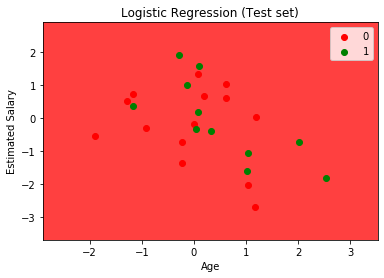

In [89]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, regressor.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/Users/admangli/anaconda3/envs/learn/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


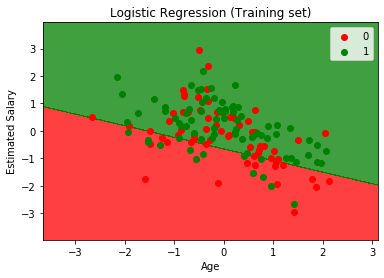

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


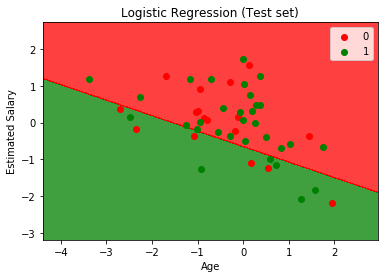

In [94]:
# Importing the dataset
# dataset = pd.read_csv('Social_Network_Ads.csv')
# X = dataset.iloc[:, [0, 3]].values
# y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()